In [33]:
#Import req lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [34]:
#reading, displaying with info
df = pd.read_csv("Mall_Customers.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [36]:
#Renaming cols for convenience 
df.columns = ['Cid', 'gender', 'age', 'income', 'spending_score']
df.head()

,Cid,gender,age,income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


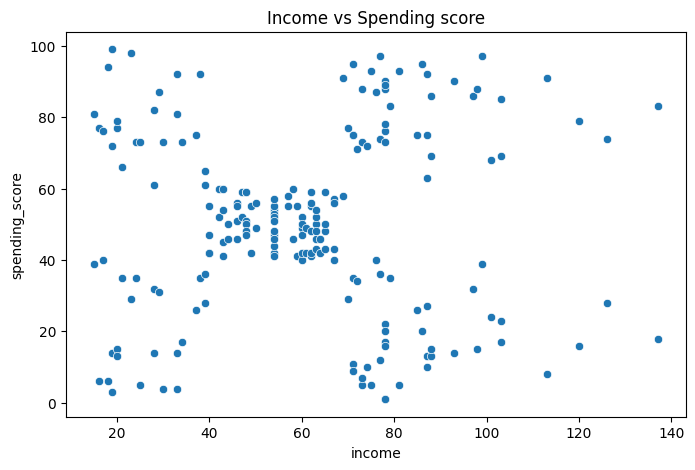

In [37]:
# Plot class distribution
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='income', y='spending_score')
plt.title('Income vs Spending score')
plt.show()

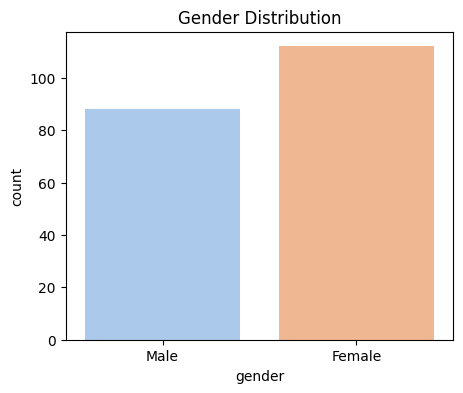

In [38]:
#Countplot on gender
plt.figure(figsize=(5, 4))
sns.countplot(x='gender', data=df, palette = 'pastel')
plt.title("Gender Distribution")
plt.show()

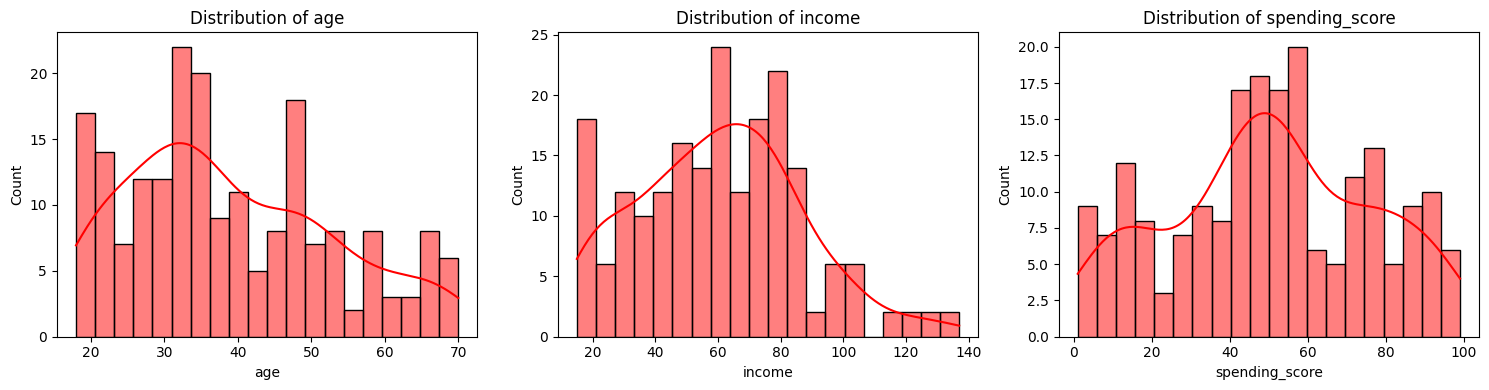

In [39]:
#Distributions based on features
plt.figure(figsize=(15, 4))
for i, col in enumerate(['age', 'income', 'spending_score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='red')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

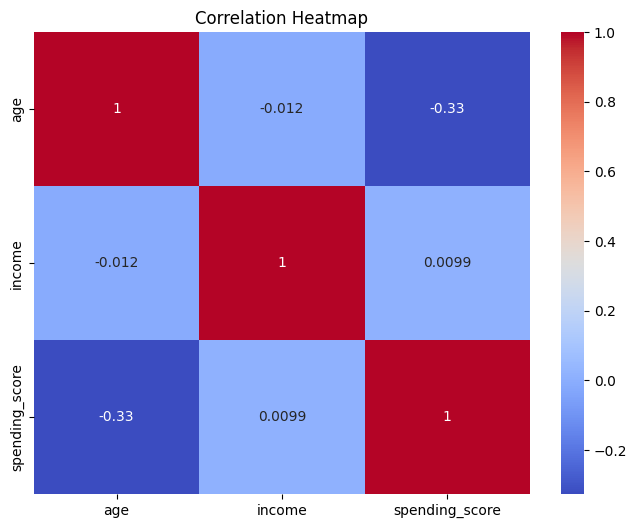

In [40]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['Cid']).select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

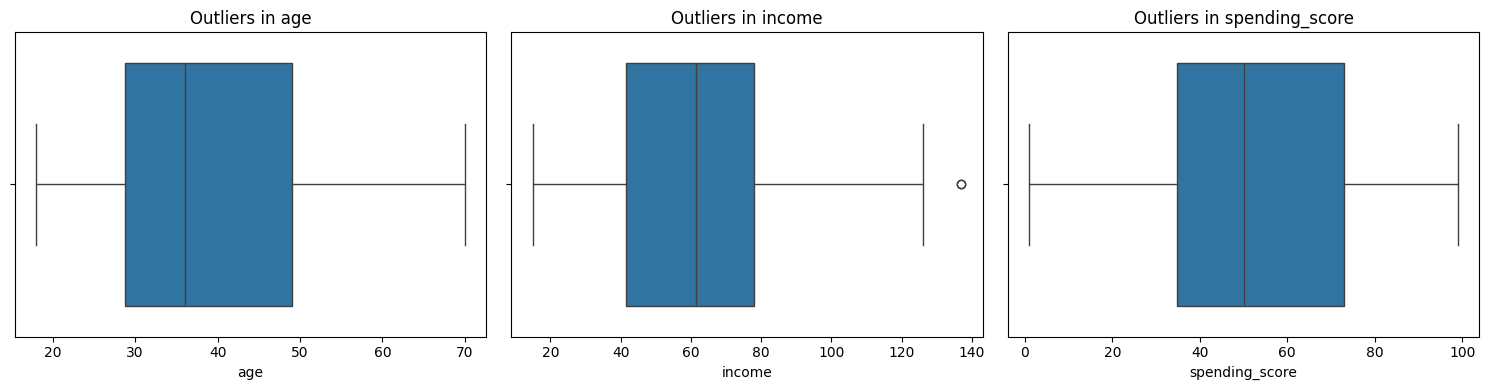

In [41]:
#Outlier removal
plt.figure(figsize=(15, 4))
for i, col in enumerate(['age', 'income', 'spending_score']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

In [42]:
#feature scaling
features = df[[ 'income', 'spending_score']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

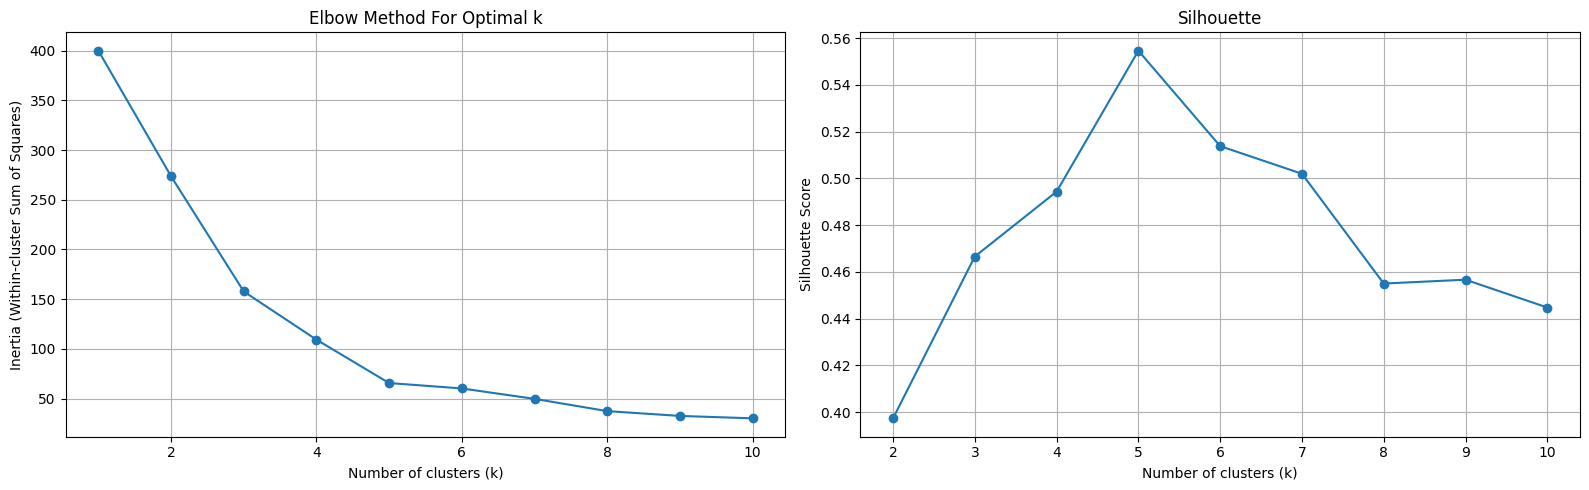

In [49]:
import warnings
warnings.filterwarnings("ignore")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Calculate inertia for different k values (Elbow Method)

inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

# First plot (Elbow Method)
ax1.plot(K, inertia, marker='o')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia (Within-cluster Sum of Squares)')
ax1.set_title('Elbow Method For Optimal k')
ax1.grid(True)

# Calculate Silhouette Scores for different k values

sil_scores = []
K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    score = silhouette_score(scaled_features, model.labels_)
    sil_scores.append(score)

# Second plot (Silhouette Score)
ax2.plot(K, sil_scores, marker='o')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title("Silhouette")
ax2.grid(True)


plt.tight_layout()
plt.show()

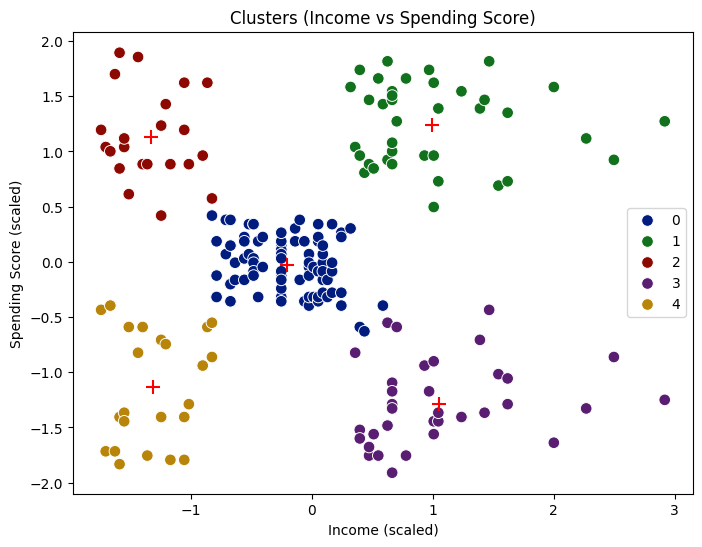

In [44]:
import warnings
warnings.filterwarnings("ignore")


kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)
# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['cluster'], palette='dark6',s=70)
cluster_centers_ = kmeans.cluster_centers_
for k in range(len(cluster_centers_)):
    plt.scatter(kmeans.cluster_centers_[k][0], kmeans.cluster_centers_[k][1], color="r", marker="+", s= 100)

plt.title("Clusters (Income vs Spending Score)")
plt.xlabel("Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

In [45]:
# Create a DataFrame for each cluster
cluster_dfs = [df[df['cluster'] == i] for i in range(kmeans.n_clusters)]

# Example: Access cluster 0
for i in cluster_dfs:
    print(i.head(),end="\n\n")
    

    Cid  gender  age  income  spending_score  cluster
43   44  Female   31      39              61        0
46   47  Female   50      40              55        0
47   48  Female   27      40              47        0
48   49  Female   29      40              42        0
49   50  Female   31      40              42        0

     Cid  gender  age  income  spending_score  cluster
123  124    Male   39      69              91        1
125  126  Female   31      70              77        1
127  128    Male   40      71              95        1
129  130    Male   38      71              75        1
131  132    Male   39      71              75        1

   Cid  gender  age  income  spending_score  cluster
1    2    Male   21      15              81        2
3    4  Female   23      16              77        2
5    6  Female   22      17              76        2
7    8  Female   23      18              94        2
9   10  Female   30      19              72        2

     Cid  gender  age  in